<a href="https://colab.research.google.com/github/RoseSarlake/spectral-image/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
# Load libraries
import numpy as np # numerical python for ND array
import matplotlib.pyplot as plt # to make plots and show images

Mounted at /content/drive


# part 1
Open VIS and IR images of painting Madonna with Two Saints


-Open both in Colab, generate gray scale and RGB preview

(2608433280,)


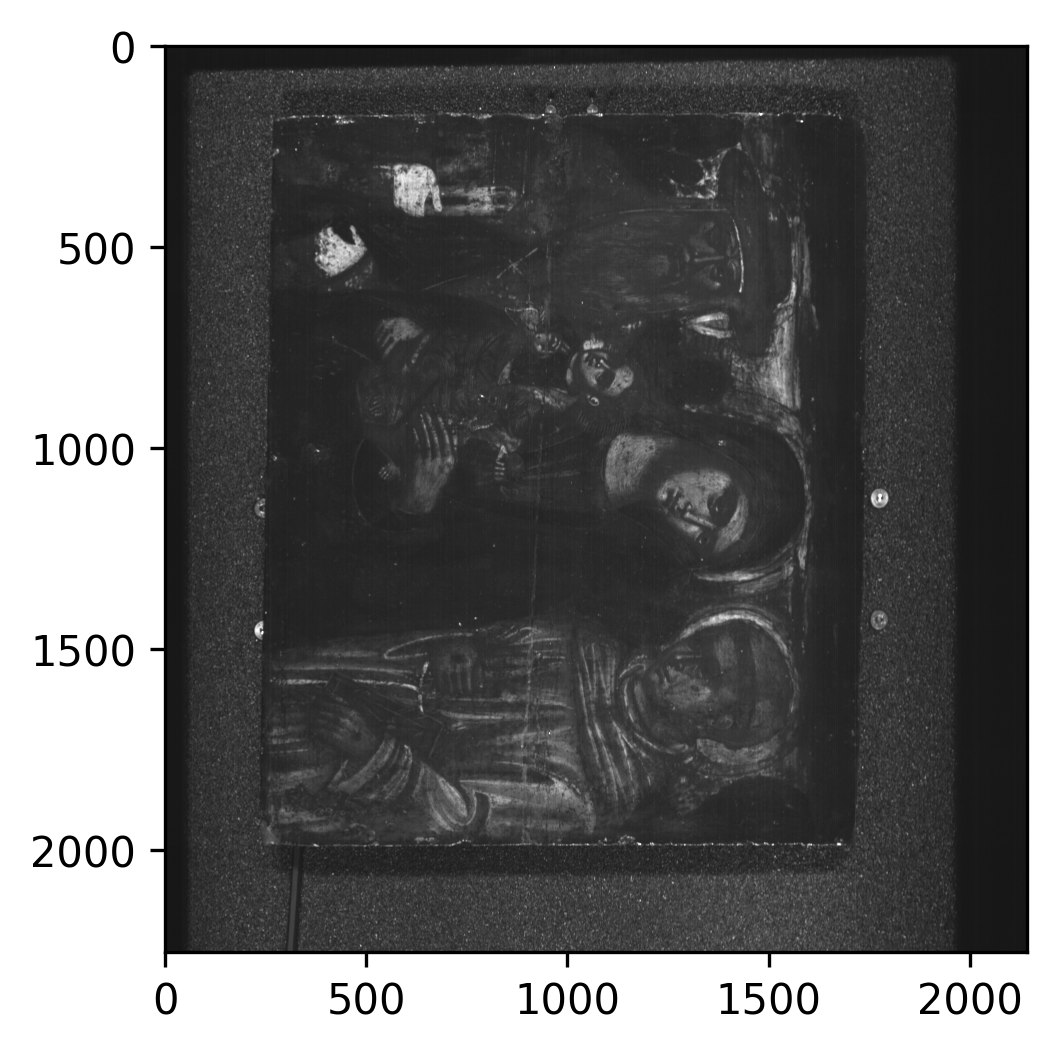

In [2]:
vispath = "/content/drive/MyDrive/ASI/savedata/paintings_Madonna_with_two_0015/capture/paintings_Dadonna_with_two_0015.raw"
fopen = open(vispath, "rb") # Open file to read in Python
raw = np.fromfile(fopen, dtype=np.uint16) #data type 12
fopen.close() # Close opened file
print(raw.shape) # print shape of 1D array we have read
samples = 2144
bands = 540
lines = 2253

# Reshape 1D to 3D. The order 'lines, bands, samples' for interleave = BIL case
spectral_image = np.reshape(raw, (lines, bands, samples)) 
plt.rcParams['figure.dpi'] = 100 # Resolution
# show gray scale slice of 3D spectral image
plt.imshow(spectral_image[:,100,:], cmap='gray', vmin=0, vmax=1255)
plt.show()

In [22]:
# Read wavelengths from hdr file
hdr_path = '/content/drive/MyDrive/ASI/savedata/paintings_Madonna_with_two_0015/capture/paintings_Dadonna_with_two_0015.hdr'

f=open(hdr_path, "r")
filelines = f.readlines()
#print(filelines)
f.close()
wavelengths = np.zeros(540,)
n = 0
for i in range(55, 55+540):
  wavelengths[n] = float(filelines[i].replace(',',''))
  print(f"{n}:-{wavelengths[n]}nm")
  n = n + 1
#print(wavelengths) 

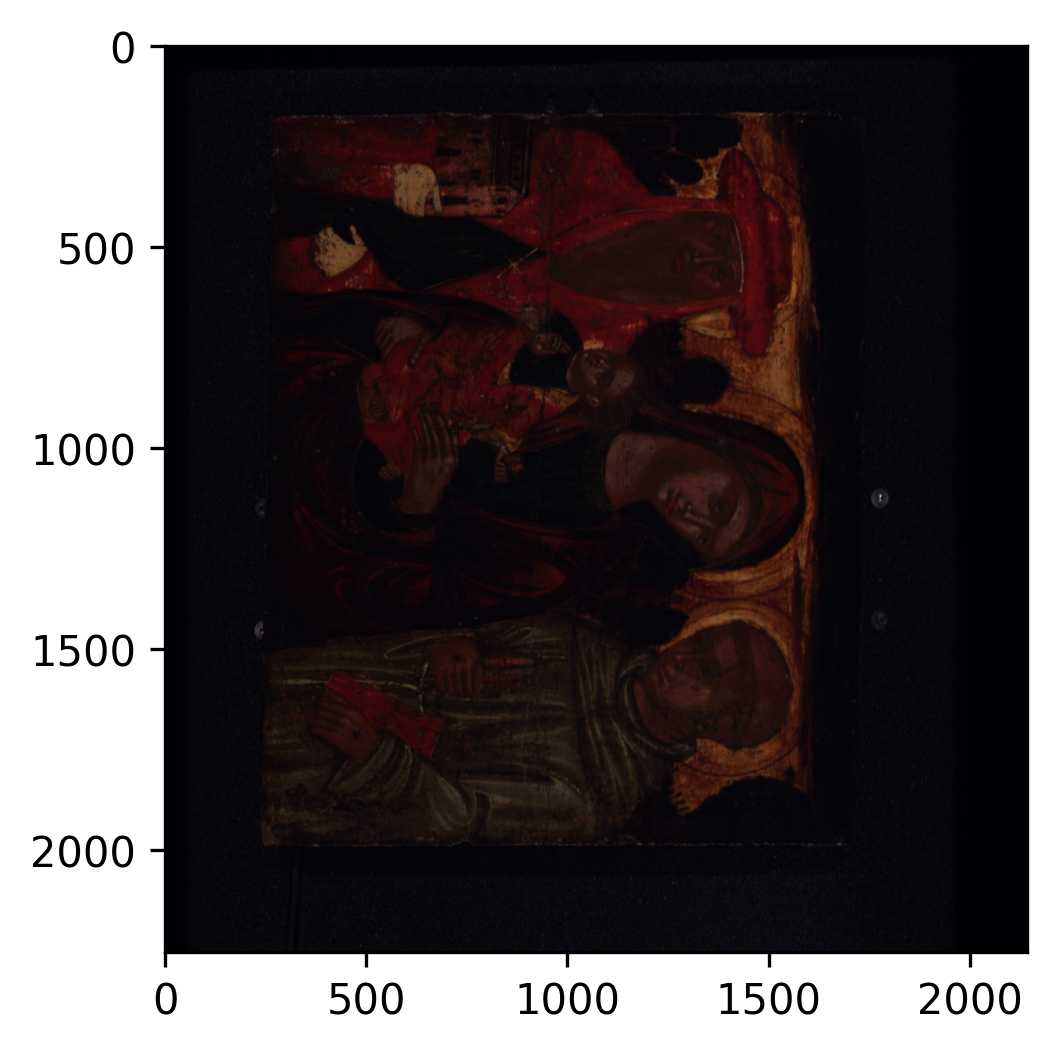

In [17]:
# preview plot RGB image -- 630 nm for red, 532 nm for green, and 465 nm for blue light
vis_RGB = np.empty((2253, 2144, 3)) 
# We go to hdr file and select channels
ch_1 = 250 # Wavelength 630.95nm
ch_2 = 171 # Wavelength 531.59nm
ch_3 = 100 # Wavelength 443.68nm
vis_RGB[:,:,0] = spectral_image[:,ch_1,:]/np.amax(spectral_image[:,ch_1,:]) # RGB in range [0,1]
vis_RGB[:,:,1] = spectral_image[:,ch_2,:]/np.amax(spectral_image[:,ch_2,:])
vis_RGB[:,:,2] = spectral_image[:,ch_3,:]/np.amax(spectral_image[:,ch_3,:])
plt.rcParams['figure.dpi'] = 100
plt.imshow(vis_RGB)
plt.show()


(77250560,)


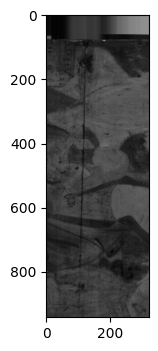

In [51]:
# IR image 
irpath = '/content/drive/MyDrive/ASI/savedata/IR_IR1_0019/capture/IR_IR1_0019.raw'

fopen = open(irpath, "rb") # Open file to read in Python
irraw = np.fromfile(fopen, dtype=np.uint16) #data type 12
fopen.close() # Close opened file
#print(irraw.shape) # print shape of 1D array we have read

samples = 320
bands = 256
lines = 943
spectral_image_ir = np.reshape(irraw, (lines, bands, samples)) # Reshape 1D to 3D. The order 'lines, bands, samples' for interleave = BIL case
np.rot90(spectral_image_ir)
plt.rcParams['figure.dpi'] = 100 # Resolution
plt.imshow(spectral_image_ir[:,150,:], cmap='gray') # show gray scale slice of 3D spectral image , vmin=0, vmax=1255
plt.show()

In [47]:
hdr_path_ir = '/content/drive/MyDrive/ASI/savedata/IR_IR1_0019/capture/IR_IR1_0019.hdr'

f=open(hdr_path_ir, "r")
filelines_ir = f.readlines()
f.close()
#print(filelines)
for fileline in filelines_ir:
    # read waves   
    n = 0
    for fileline in filelines_ir:
        if 'th = {' in fileline.lower():
          
          n1 = n+1
        n = n + 1
    n2 = n1 + bands
    wavelengths_ir = np.zeros(n2-n1,)
    n = 0
    for i in range(n1, n2):
        #print(filelines[i])
        wavelengths_ir[n] = float(filelines_ir[i].replace(',',''))
        #print(waves[n])
        n = n + 1 
# for i in range(len(wavelengths_ir)):
#   print(f"{i}:-{wavelengths_ir[i]}nm")
          


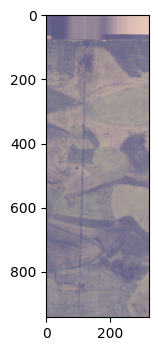

In [48]:
# preview plot RGB image(false color)
ir_RGB = np.empty((943, 320, 3)) 
# We go to hdr file and select channels
ch_1 = 90 
ch_2 = 140 
ch_3 = 210 
ir_RGB[:,:,0] = spectral_image_ir[:,ch_1,:]/np.amax(spectral_image_ir[:,ch_1,:]) # RGB in range [0,1]
ir_RGB[:,:,1] = spectral_image_ir[:,ch_2,:]/np.amax(spectral_image_ir[:,ch_2,:])
ir_RGB[:,:,2] = spectral_image_ir[:,ch_3,:]/np.amax(spectral_image_ir[:,ch_3,:])
plt.rcParams['figure.dpi'] = 100
plt.imshow(ir_RGB)
plt.show()


-Consider white sample from the Capture folder and try to make white correction based on single white spectrum

# part 2
Open ENVI from Japanese spectral camera


In [ ]:
path2 = '/content/drive/MyDrive/ASI/savedata/colorChecker.nh7'


# part 3
Open ENVI from Japanese spectral camera

In [ ]:
path3 = ''

#part 4
Save ENVI spectral image with interleave = bil/bip

In [ ]:
path4 = '/content/drive/MyDrive/ASI/Lectures+Exercises/Lecture 2/Spectral images/Colorchecker 121 ms (for Freelook demo)/capture/Colorchecker.raw'
